In [1]:
#导入基本包
import networkx as nx
import osmnx as ox
import requests
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
ox.config(use_cache=True, log_console=True)
ox.__version__ #查看ox的版本

'0.10'

In [2]:
# 定义洛杉矶的中心经纬度
center_point = (34.03,-118.15)
# 获取中心经纬度周围30公里以内的图，并简化
G = ox.graph_from_point(center_point,distance = 35000,network_type='drive',simplify=True,infrastructure='way["highway"~"motorway"]' )

In [3]:
loops = [edge[0] for edge in nx.selfloop_edges(G)]
nc = ['m' if node in loops else 'b' for node in G.nodes()]

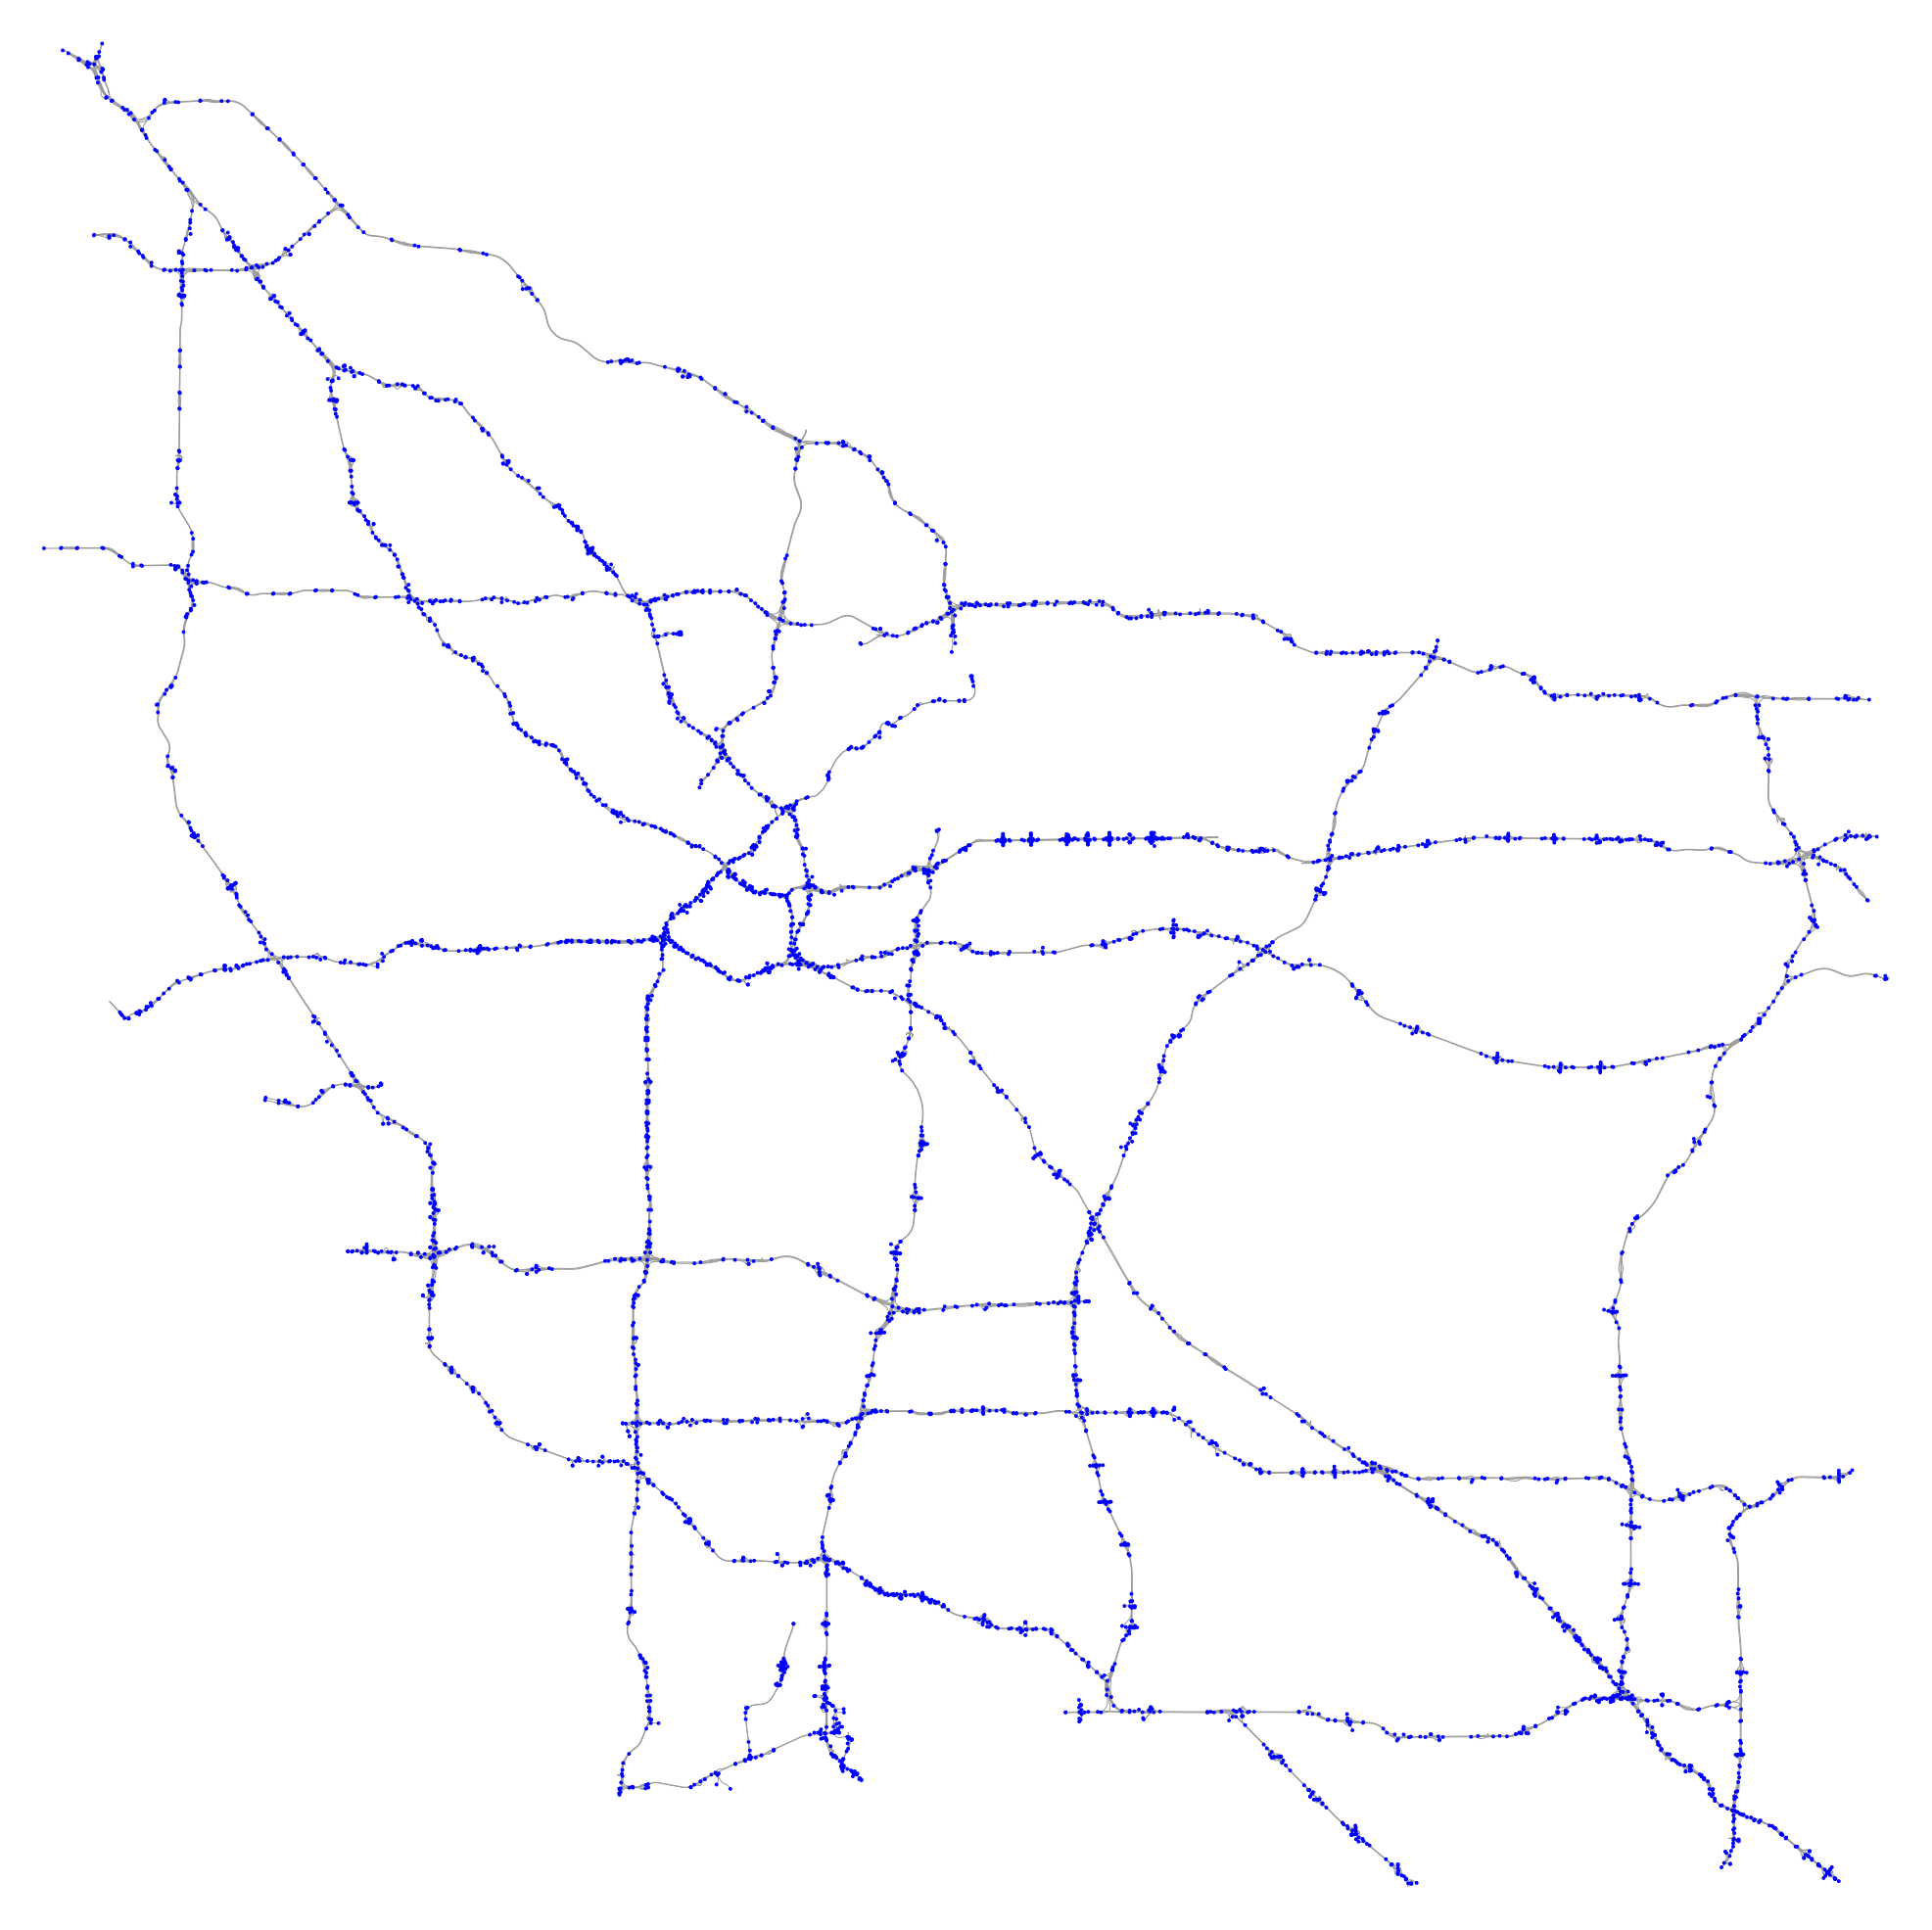

In [4]:
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3,fig_height=36,fig_width=36)

In [5]:
#读取经纬度
import pandas as pd
data_point = pd.read_csv('D:/test/Traffic Accident Analysis/生成经度和纬度(唯一值)/2016_经纬度.csv')

In [6]:
X = data_point['lat']
Y = data_point['lon']

In [7]:
somnus = []
for i in range(len(X)):
    if ox.get_nearest_node(G,(X[i],Y[i])) not in somnus:
        somnus.append(ox.get_nearest_node(G,(X[i],Y[i])))
count1 = []
for i in somnus:
    if i not in count1:
        count1.append(i)

In [8]:
nc1 = []
ns1 = []
for node in G.nodes():
    s = True
    for cur in count1:
        if node == cur and s:
            nc1.append('r')
            ns1.append(50)
            s = False
    if s:
        nc1.append('b')
        ns1.append(8)

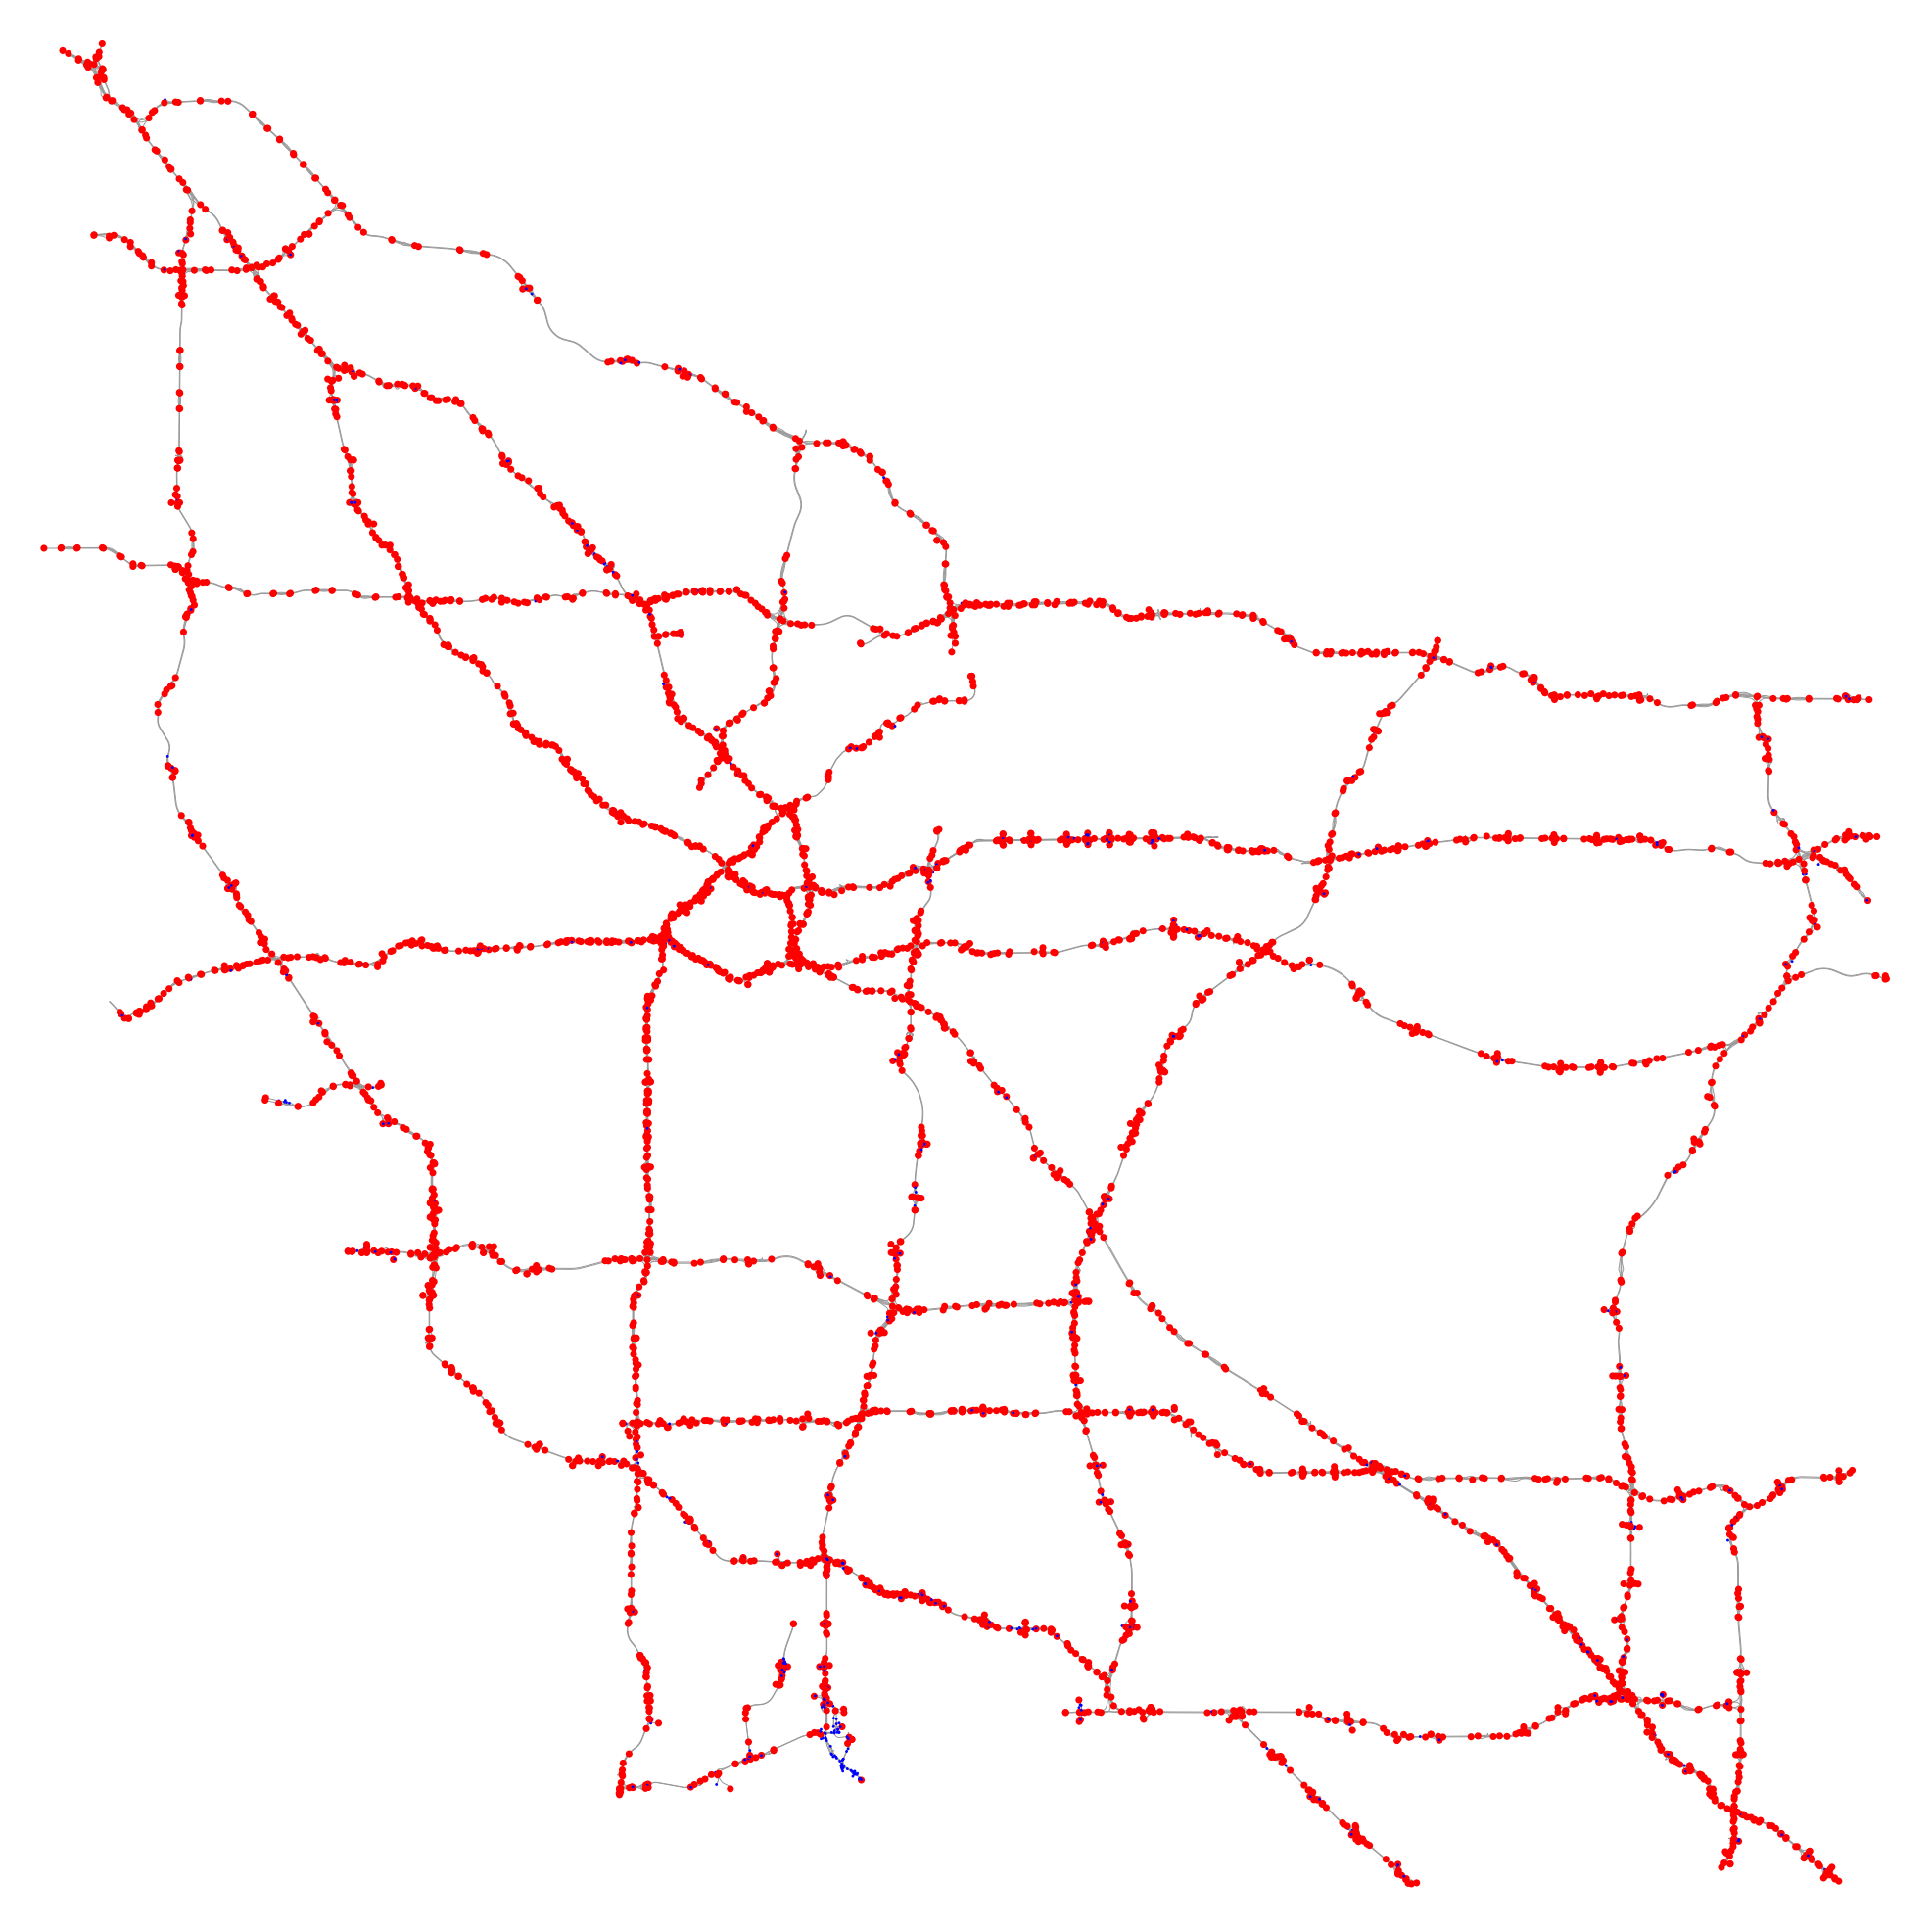

In [9]:
fig, ax = ox.plot_graph(G, node_color=nc1, node_size=ns1,node_zorder=3,fig_height=36,fig_width=36)

In [10]:
A=np.array(nx.adjacency_matrix(G).todense())#获取图的邻接矩阵

In [11]:
print(A)#输出邻接矩阵

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(len(A))

5367


In [13]:
print(len(G.nodes()))

5367


In [14]:
dt_time=pd.date_range('2016-01-01 00:00','2016-12-31 23:59', freq='30min')#需要的时间戳，每半个小时为单位

In [16]:
print(dt_time)

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:30:00',
               '2016-01-01 01:00:00', '2016-01-01 01:30:00',
               '2016-01-01 02:00:00', '2016-01-01 02:30:00',
               '2016-01-01 03:00:00', '2016-01-01 03:30:00',
               '2016-01-01 04:00:00', '2016-01-01 04:30:00',
               ...
               '2016-12-31 19:00:00', '2016-12-31 19:30:00',
               '2016-12-31 20:00:00', '2016-12-31 20:30:00',
               '2016-12-31 21:00:00', '2016-12-31 21:30:00',
               '2016-12-31 22:00:00', '2016-12-31 22:30:00',
               '2016-12-31 23:00:00', '2016-12-31 23:30:00'],
              dtype='datetime64[ns]', length=17568, freq='30T')


In [17]:
dt_all = []
cur = []
for i in range(len(dt_time)):
    cur.append(dt_time[i])
    if i == 0 :
        continue
    if i % 335 == 0:
        dt_all.append(cur)
        cur = []

In [18]:
for seq in dt_all:
    print(seq)
    print('=========================================================')
    print('=========================================================')

[Timestamp('2016-01-01 00:00:00', freq='30T'), Timestamp('2016-01-01 00:30:00', freq='30T'), Timestamp('2016-01-01 01:00:00', freq='30T'), Timestamp('2016-01-01 01:30:00', freq='30T'), Timestamp('2016-01-01 02:00:00', freq='30T'), Timestamp('2016-01-01 02:30:00', freq='30T'), Timestamp('2016-01-01 03:00:00', freq='30T'), Timestamp('2016-01-01 03:30:00', freq='30T'), Timestamp('2016-01-01 04:00:00', freq='30T'), Timestamp('2016-01-01 04:30:00', freq='30T'), Timestamp('2016-01-01 05:00:00', freq='30T'), Timestamp('2016-01-01 05:30:00', freq='30T'), Timestamp('2016-01-01 06:00:00', freq='30T'), Timestamp('2016-01-01 06:30:00', freq='30T'), Timestamp('2016-01-01 07:00:00', freq='30T'), Timestamp('2016-01-01 07:30:00', freq='30T'), Timestamp('2016-01-01 08:00:00', freq='30T'), Timestamp('2016-01-01 08:30:00', freq='30T'), Timestamp('2016-01-01 09:00:00', freq='30T'), Timestamp('2016-01-01 09:30:00', freq='30T'), Timestamp('2016-01-01 10:00:00', freq='30T'), Timestamp('2016-01-01 10:30:00', 

In [19]:
node_G = []
for node in G.nodes():
    node_G.append(node)
print(node_G)

[122421282, 7000686676, 7000686680, 1335885913, 1833697499, 417988829, 417988830, 417988831, 417988848, 417988849, 3010199900, 359137716, 1619395035, 6355812958, 29098630, 29098639, 1832518320, 1842086610, 122422025, 122422043, 20972398, 20972402, 5226234759, 20972433, 20972458, 20972501, 5377623059, 298583108, 300942440, 29885564, 358614145, 310903943, 1922434185, 4035314875, 26740001, 26740008, 26740011, 17040712, 298583385, 20972899, 483001710, 20972913, 1716782463, 20972936, 5707531670, 298583456, 310904258, 300942792, 1715209709, 1351878128, 348128809, 348128835, 4033611439, 20842200, 298583770, 298583778, 298583780, 529401634, 1371539235, 122423110, 122554211, 63965056, 359139229, 300943297, 2390493225, 63965242, 13885935, 1967655164, 25954603, 300943712, 1393035678, 1393035683, 1393035685, 1393035690, 1393035694, 1393035699, 316803571, 138283524, 418122280, 122423849, 122423858, 409340509, 409340590, 298584750, 409340601, 2433878713, 298584760, 2433878717, 409340606, 300944078, 

In [20]:
print(len(dt_all))

52


In [22]:
data = []
for i in range(len(dt_all)):
    cur_matrix = []
    for j in range(len(node_G)):
        cur = [0] * len(dt_all[0])
        cur_matrix.append(cur)
    data.append(cur_matrix)

In [29]:
print(len(data))#个数
print(len(data[0][0]))#列
print(len(data[0]))#行

52
336
5367


In [48]:
data_2016 = pd.read_csv('D:/test/Traffic Accident Analysis/Data_pre_deal/2016_经纬度+时间.csv')

In [49]:
print(data_2016.head(10))

   Unnamed: 0         lng        lat                   time
0           0 -118.073607  34.095942  2016-01-01 22:40:00.0
1           1 -118.354601  34.133876  2016-01-01 22:32:00.0
2           2 -118.354601  34.133876  2016-01-01 22:32:00.0
3           3 -118.474262  34.186646  2016-01-01 22:23:00.0
4           4 -118.474262  34.186646  2016-01-01 22:23:00.0
5           5 -118.474262  34.186646  2016-01-01 22:23:00.0
6           6 -118.474262  34.186646  2016-01-01 22:23:00.0
7           7 -118.474262  34.186646  2016-01-01 22:23:00.0
8           8 -118.474262  34.186646  2016-01-01 22:23:00.0
9           9 -118.474262  34.186646  2016-01-01 22:23:00.0


In [50]:
cur_data_time = data_2016['time']

In [51]:
print(cur_data_time.head(10))

0    2016-01-01 22:40:00.0
1    2016-01-01 22:32:00.0
2    2016-01-01 22:32:00.0
3    2016-01-01 22:23:00.0
4    2016-01-01 22:23:00.0
5    2016-01-01 22:23:00.0
6    2016-01-01 22:23:00.0
7    2016-01-01 22:23:00.0
8    2016-01-01 22:23:00.0
9    2016-01-01 22:23:00.0
Name: time, dtype: object


In [52]:
print(len(data_2016))

1837647


In [53]:
data_2016 = pd.DataFrame(data_2016)

In [54]:
print(data_2016[1:3])

   Unnamed: 0         lng        lat                   time
1           1 -118.354601  34.133876  2016-01-01 22:32:00.0
2           2 -118.354601  34.133876  2016-01-01 22:32:00.0


In [55]:
print(data_2016.iloc[0])

Unnamed: 0                        0
lng                        -118.074
lat                         34.0959
time          2016-01-01 22:40:00.0
Name: 0, dtype: object


In [56]:
print(data_2016.iloc[0]['time'])

2016-01-01 22:40:00.0


In [61]:
for i in range(len(data_2016)):
    if data_2016.iloc[i]['time'][0] == 2:
#         print('lat:',data_2016.iloc[i]['lat'])
#         print('lng:',data_2016.iloc[i]['lng'])
        pd.to_datetime(data_2016.iloc[i]['time'],format="%Y/%m/%d %H:%M")

In [62]:
for i in range(len(data_2016)):#遍历数据
    if data_2016.iloc[i]['time'][0] == 2:
        cur_lat_lon = ox.get_nearest_node(G,(data_2016.iloc[i]['lat'],data_2016.iloc[i]['lng']))
        cur_index = node_G.index(cur_lat_lon)
        for j in range(len(dt_all)):#遍历时间间隔组
            for k in range(len(dt_all[0])-1):#遍历每一组时间间隔的分时间点
                if (data_2016.iloc[i]['time'] > dt_all[j][k]) and (data_2016.iloc[i]['time'] < dt_all[j][k+1]):
                    data[i][cur_index][k] += 1

In [63]:
import scipy.sparse

In [77]:
my_matrix_0 = scipy.sparse.csr_matrix(data[0])
my_matrix_1 = scipy.sparse.csr_matrix(data[1])
my_matrix_2 = scipy.sparse.csr_matrix(data[2])
my_matrix_3 = scipy.sparse.csr_matrix(data[3])
my_matrix_4 = scipy.sparse.csr_matrix(data[4])
my_matrix_5 = scipy.sparse.csr_matrix(data[5])
my_matrix_6 = scipy.sparse.csr_matrix(data[6])
my_matrix_7 = scipy.sparse.csr_matrix(data[7])
my_matrix_8 = scipy.sparse.csr_matrix(data[8])
my_matrix_9 = scipy.sparse.csr_matrix(data[9])

In [78]:
my_matrix_10 = scipy.sparse.csr_matrix(data[10])
my_matrix_11 = scipy.sparse.csr_matrix(data[11])
my_matrix_12 = scipy.sparse.csr_matrix(data[12])
my_matrix_13 = scipy.sparse.csr_matrix(data[13])
my_matrix_14 = scipy.sparse.csr_matrix(data[14])
my_matrix_15 = scipy.sparse.csr_matrix(data[15])
my_matrix_16 = scipy.sparse.csr_matrix(data[16])
my_matrix_17 = scipy.sparse.csr_matrix(data[17])
my_matrix_18 = scipy.sparse.csr_matrix(data[18])
my_matrix_19 = scipy.sparse.csr_matrix(data[19])

In [79]:
my_matrix_20 = scipy.sparse.csr_matrix(data[20])
my_matrix_21 = scipy.sparse.csr_matrix(data[21])
my_matrix_22 = scipy.sparse.csr_matrix(data[22])
my_matrix_23 = scipy.sparse.csr_matrix(data[23])
my_matrix_24 = scipy.sparse.csr_matrix(data[24])
my_matrix_25 = scipy.sparse.csr_matrix(data[25])
my_matrix_26 = scipy.sparse.csr_matrix(data[26])
my_matrix_27 = scipy.sparse.csr_matrix(data[27])
my_matrix_28 = scipy.sparse.csr_matrix(data[28])
my_matrix_29 = scipy.sparse.csr_matrix(data[29])

In [80]:
my_matrix_30 = scipy.sparse.csr_matrix(data[30])
my_matrix_31 = scipy.sparse.csr_matrix(data[31])
my_matrix_32 = scipy.sparse.csr_matrix(data[32])
my_matrix_33 = scipy.sparse.csr_matrix(data[33])
my_matrix_34 = scipy.sparse.csr_matrix(data[34])
my_matrix_35 = scipy.sparse.csr_matrix(data[35])
my_matrix_36 = scipy.sparse.csr_matrix(data[36])
my_matrix_37 = scipy.sparse.csr_matrix(data[37])
my_matrix_38 = scipy.sparse.csr_matrix(data[38])
my_matrix_39 = scipy.sparse.csr_matrix(data[39])

In [81]:
my_matrix_40 = scipy.sparse.csr_matrix(data[40])
my_matrix_41 = scipy.sparse.csr_matrix(data[41])
my_matrix_42 = scipy.sparse.csr_matrix(data[42])
my_matrix_43 = scipy.sparse.csr_matrix(data[43])
my_matrix_44 = scipy.sparse.csr_matrix(data[44])
my_matrix_45 = scipy.sparse.csr_matrix(data[45])
my_matrix_46 = scipy.sparse.csr_matrix(data[46])
my_matrix_47 = scipy.sparse.csr_matrix(data[47])
my_matrix_48 = scipy.sparse.csr_matrix(data[48])
my_matrix_49 = scipy.sparse.csr_matrix(data[49])
my_matrix_50 = scipy.sparse.csr_matrix(data[50])
my_matrix_51 = scipy.sparse.csr_matrix(data[51])

In [75]:
for i in range(len(data)):
    scipy.sparse.save_npz('./filename_i.npz', my_matrix_i) 

In [82]:
scipy.sparse.save_npz('./filename_0.npz', my_matrix_0) 
scipy.sparse.save_npz('./filename_1.npz', my_matrix_1) 
scipy.sparse.save_npz('./filename_2.npz', my_matrix_2) 
scipy.sparse.save_npz('./filename_3.npz', my_matrix_3) 
scipy.sparse.save_npz('./filename_4.npz', my_matrix_4) 
scipy.sparse.save_npz('./filename_5.npz', my_matrix_5) 
scipy.sparse.save_npz('./filename_6.npz', my_matrix_6) 
scipy.sparse.save_npz('./filename_7.npz', my_matrix_7) 
scipy.sparse.save_npz('./filename_8.npz', my_matrix_8) 
scipy.sparse.save_npz('./filename_9.npz', my_matrix_9) 

In [83]:
scipy.sparse.save_npz('./filename_10.npz', my_matrix_10) 
scipy.sparse.save_npz('./filename_11.npz', my_matrix_11) 
scipy.sparse.save_npz('./filename_12.npz', my_matrix_12) 
scipy.sparse.save_npz('./filename_13.npz', my_matrix_13) 
scipy.sparse.save_npz('./filename_14.npz', my_matrix_14) 
scipy.sparse.save_npz('./filename_15.npz', my_matrix_15) 
scipy.sparse.save_npz('./filename_16.npz', my_matrix_16) 
scipy.sparse.save_npz('./filename_17.npz', my_matrix_17) 
scipy.sparse.save_npz('./filename_18.npz', my_matrix_18) 
scipy.sparse.save_npz('./filename_19.npz', my_matrix_19) 

In [84]:
scipy.sparse.save_npz('./filename_20.npz', my_matrix_20) 
scipy.sparse.save_npz('./filename_21.npz', my_matrix_21) 
scipy.sparse.save_npz('./filename_22.npz', my_matrix_22) 
scipy.sparse.save_npz('./filename_23.npz', my_matrix_23) 
scipy.sparse.save_npz('./filename_24.npz', my_matrix_24) 
scipy.sparse.save_npz('./filename_25.npz', my_matrix_25) 
scipy.sparse.save_npz('./filename_26.npz', my_matrix_26) 
scipy.sparse.save_npz('./filename_27.npz', my_matrix_27) 
scipy.sparse.save_npz('./filename_28.npz', my_matrix_28) 
scipy.sparse.save_npz('./filename_29.npz', my_matrix_29) 

In [85]:
scipy.sparse.save_npz('./filename_30.npz', my_matrix_30) 
scipy.sparse.save_npz('./filename_31.npz', my_matrix_31) 
scipy.sparse.save_npz('./filename_32.npz', my_matrix_32) 
scipy.sparse.save_npz('./filename_33.npz', my_matrix_33) 
scipy.sparse.save_npz('./filename_34.npz', my_matrix_34) 
scipy.sparse.save_npz('./filename_35.npz', my_matrix_35) 
scipy.sparse.save_npz('./filename_36.npz', my_matrix_36) 
scipy.sparse.save_npz('./filename_37.npz', my_matrix_37) 
scipy.sparse.save_npz('./filename_38.npz', my_matrix_38) 
scipy.sparse.save_npz('./filename_39.npz', my_matrix_39) 

In [86]:
scipy.sparse.save_npz('./filename_40.npz', my_matrix_40) 
scipy.sparse.save_npz('./filename_41.npz', my_matrix_41) 
scipy.sparse.save_npz('./filename_42.npz', my_matrix_42) 
scipy.sparse.save_npz('./filename_43.npz', my_matrix_43) 
scipy.sparse.save_npz('./filename_44.npz', my_matrix_44) 
scipy.sparse.save_npz('./filename_45.npz', my_matrix_45) 
scipy.sparse.save_npz('./filename_46.npz', my_matrix_46) 
scipy.sparse.save_npz('./filename_47.npz', my_matrix_47) 
scipy.sparse.save_npz('./filename_48.npz', my_matrix_48) 
scipy.sparse.save_npz('./filename_49.npz', my_matrix_49) 
scipy.sparse.save_npz('./filename_50.npz', my_matrix_50) 
scipy.sparse.save_npz('./filename_51.npz', my_matrix_51)